In [19]:
# Data.csv: This CSV file contains information about the Air Quality Station, state, pollutant measurement, and a few other things about station location

# State_data.csv: This CSV file contains states, their area, and population

# NCAP_Funding.csv: This CSV file contains city, state, and funds received by them for different years

# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#reading the data from the csv files
data = pd.read_csv('Data.csv')
state_data = pd.read_csv('State_data.csv')
funding = pd.read_csv('NCAP_Funding.csv')


In [20]:
data.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
state_data.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


In [22]:
funding.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


## Spatial aggregation.





**1.  Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?**

In [23]:
state_pm = data.groupby("state")["PM2.5"].mean().sort_values(ascending = False)

print(f"The state with highest average PM2.5 is {state_pm.index[0]} with {state_pm.iloc[0]:.2f}")

The state with highest average PM2.5 is Delhi with 104.10


**2.  Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 μg/m³) for the year 2023?**

In [24]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['year'] = data['Timestamp'].dt.year                # extracting year from the timestamp
data['date'] = data['Timestamp'].dt.date                # extracting date from the timestamp

state_hazardous = data[(data['PM2.5'] > 300) & (data['year'] == 2023)]
state_hazardous_days = state_hazardous.groupby(['state','date'])['PM2.5'].count().reset_index()
state_hazardous_count = state_hazardous_days.groupby('state')['PM2.5'].count().sort_values(ascending = False)

print(f"The state with most days with hazardous PM2.5 levels in 2023 is {state_hazardous_count.index[0]} with {state_hazardous_count.iloc[0]} days")

The state with most days with hazardous PM2.5 levels in 2023 is Delhi with 49 days


**3.  Which state has the highest variability in PM2.5 levels across its monitoring stations in 
2023? (Think how would you measure variability)**

In [25]:
# Measuring variability by calculating the standard deviation of PM2.5 levels across monitoring stations in each state.

data_2023 = data[data['year'] == 2023]
state_variability = data_2023.groupby('state')['PM2.5'].std().sort_values(ascending = False)

print(f"The state with highest variability in PM2.5 levels across its monitoring stations in 2023 is {state_variability.index[0]} with {state_variability.iloc[0]:.2f}")

The state with highest variability in PM2.5 levels across its monitoring stations in 2023 is Delhi with 82.80


**4.  Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?**

In [26]:
data_2020_2021 = data[(data['year'] == 2021) | (data['year'] == 2020)]
lowest_pm = data_2020_2021.groupby('state')['PM2.5'].mean().sort_values()

print(f"The state with lowest average PM2.5 levels in covid is {lowest_pm.index[0]} with {lowest_pm.iloc[0]:.2f}")

# this is excluding states with no data for 2020 and 2021 (NaN values)

The state with lowest average PM2.5 levels in covid is Mizoram with 14.32


## Temporal Aggregation

**1.  Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.**

In [27]:
data_2020 = data[data["year"] == 2020]
aug_2020 = data_2020[data_2020["Timestamp"].dt.month == 8]                  # using dt function to extract month from timestamp and then filtering for August
aug_2020_max = aug_2020.groupby("station")["PM2.5"].max().sort_values(ascending = False)

print(f"The state with highest PM2.5 levels in August 2020 is {aug_2020_max.index[0]} with {aug_2020_max.iloc[0]:.2f}")

The state with highest PM2.5 levels in August 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with 805.51


**2.  For the year 2018, calculate the average PM2.5 concentration for each season**  

(Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September)   
For stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB.  
Identifying the season with the highest pollution. 

[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [28]:
data_2018 = data[data["year"] == 2018].copy()      # need to make a copy of the data to avoid 'SettingWithCopyWarning' 

data_2018['month'] = data_2018['Timestamp'].dt.month

def season(month):
    if month in [3, 4, 5]:
        return 'Summer'
    elif month in [12, 1, 2]:
        return 'Winter'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
   
data_2018['season'] = data_2018['month'].apply(season)

lal_bahadur = data_2018[data_2018['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
season_pm = lal_bahadur.groupby('season')['PM2.5'].mean().sort_values(ascending = False)

print(f"The average PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB in summer is {season_pm['Summer']}")
print(f"The average PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB in winter is {season_pm['Winter']}")
print(f"The average PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB in monsoon is {season_pm['Monsoon']} \n")

print(f"The season with the highest average PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB is {season_pm.index[0]} with {season_pm.iloc[0]}")

# Following are some potential factors on why certain seasons have higher pollution levels than others:

# Weather conditions: Certain seasons have weather conditions more conducive to air pollution. 
# In winter, due to the emission of particulate matter from the heaters and wood resources used in fireplaces, the average PM2.5 concentration is higher
# Agricultural activities like burning of crop residue take place during the winter, leading to an increase in the average concentration of PM2.5
# In monsoons, high humidity, and rain prevent dust from being stirred up and help to remove pollutants in the air, leading to a decrease in the average concentration of PM2.5

The average PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB in summer is nan
The average PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB in winter is 67.4923443634478
The average PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB in monsoon is 34.42519611317571 

The season with the highest average PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB is Winter with 67.4923443634478


**3.  Compare the average PM2.5 levels during weekends and weekdays for the station LalBahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021.**  
Create a plot to 
show these trends Steps:  
a.  Calculate the monthly average PM2.5 for weekdays and weekends separately  
b.  X-axis: Months (January to December).  
c.  Y-axis: Average PM2.5 levels.  
d.  Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends  

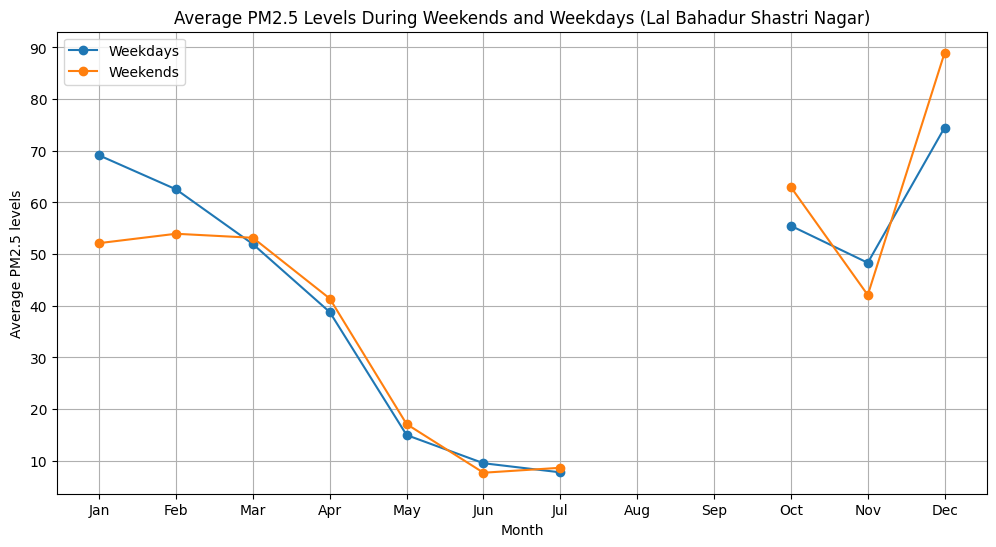

In [29]:
data_2021 = data[data['year'] == 2021].copy()

data_2021['day_of_week'] = data_2021['Timestamp'].dt.dayofweek
data_2021['month'] = data_2021['Timestamp'].dt.month

data_2021['weekend'] = data_2021['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)
data_2021['weekdays'] = 1 - data_2021['weekend']  # More efficient way to define weekdays

lal_bahadur_2021 = data_2021[data_2021['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'].copy()
monthly_pm = lal_bahadur_2021.groupby(['month', 'weekend'])['PM2.5'].mean().unstack()  # using unstack() to create separate columns for weekdays and weekend to compare them easily.

monthly_pm.plot(kind = 'line', figsize = (12, 6), marker = 'o')

plt.xlabel('Month')
plt.ylabel('Average PM2.5 levels')
plt.title('Average PM2.5 Levels During Weekends and Weekdays (Lal Bahadur Shastri Nagar)')
plt.xticks(ticks = range(1, 13), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['Weekdays', 'Weekends'])
plt.grid(True)
plt.show()

## Spatio-temporal aggregation 



**1.  For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May).**  
**Which state has the most difference (increase or decrease) for the year 2022?**


In [30]:
data_2022 = data[data['year'] == 2022].copy()

data_2022['month'] = data_2022['Timestamp'].dt.month
data_2022['season'] = data_2022['month'].apply(lambda x: 'Monsoon' if x in [6, 7, 8, 9] else 'Summer' if x in [3, 4, 5] else 'winter')

state_pm_2022 = data_2022.groupby(['state', 'season'])['PM2.5'].mean()
state_pm_2022 = state_pm_2022.unstack()
state_pm_2022['Difference'] = (state_pm_2022['Monsoon'] - state_pm_2022['Summer']) / state_pm_2022['Summer'] * 100

most_diff_state = state_pm_2022['Difference'].abs().idxmax()
most_diff_value = state_pm_2022.loc[most_diff_state, 'Difference']

print(f"The state with the most difference in PM2.5 levels during monsoon and summer months in 2022 is {most_diff_state} with a difference of {most_diff_value:.2f}%")

The state with the most difference in PM2.5 levels during monsoon and summer months in 2022 is Assam with a difference of -61.18%


**2.  Plot the average PM2.5 levels for Delhi across each season**  
Winter: December-February, Summer: March-May, Monsoon: June-September, from 2017 to 2023  
What seasonal variation, if any, can you observe in pollution levels? 


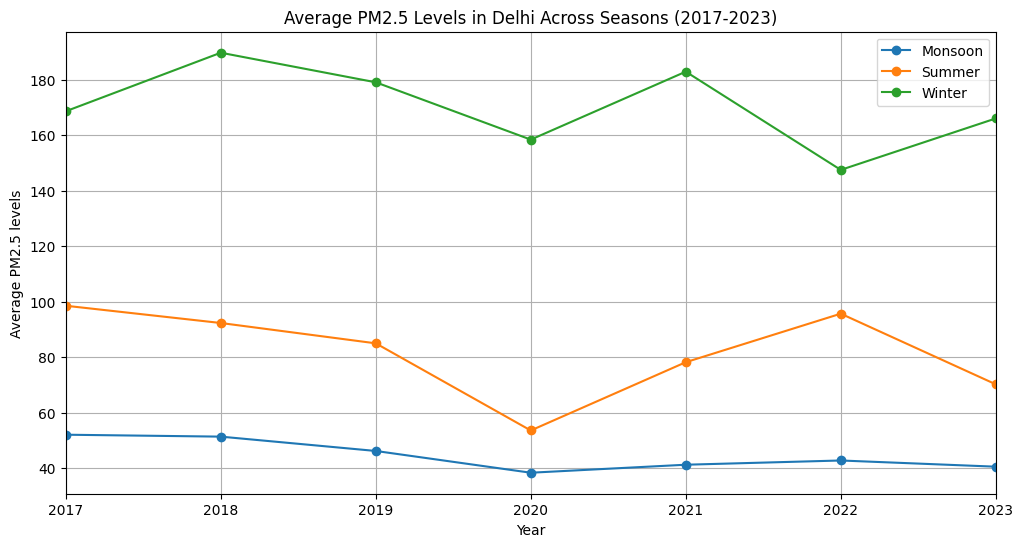

In [31]:
data_delhi = data[data['state'] == 'Delhi'].copy()

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'

data_delhi['month'] = data_delhi['Timestamp'].dt.month
data_delhi['season'] = data_delhi['month'].apply(get_season)
delhi_pm = data_delhi.groupby(['year', 'season'])['PM2.5'].mean().unstack()
 
delhi_pm.plot(kind = 'line', figsize = (12, 6), marker = 'o')

plt.xlabel('Year')
plt.ylabel('Average PM2.5 levels')
plt.xlim(2017, 2023)
plt.title('Average PM2.5 Levels in Delhi Across Seasons (2017-2023)')
plt.xticks(ticks=range(2017, 2024))
plt.legend(['Monsoon', 'Summer', 'Winter'])
plt.grid(True)
plt.show()

# seasonal variations in pollution levels in Delhi are as follows:
# Winter: PM2.5 levels are highest during the winter months.
# Summer: PM2.5 levels are relatively lower during the summer months. 
# Monsoon: PM2.5 levels are lowest during the monsoon months.
# We can see a decrease in the average PM2.5 levels during 2019, it is due to the COVID-19 lockdown period in which there was a great decrease in the transportation and industrial activities.

**3.  Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023.  
Which city had more fluctuations? Hint: Think what fluctuation means**

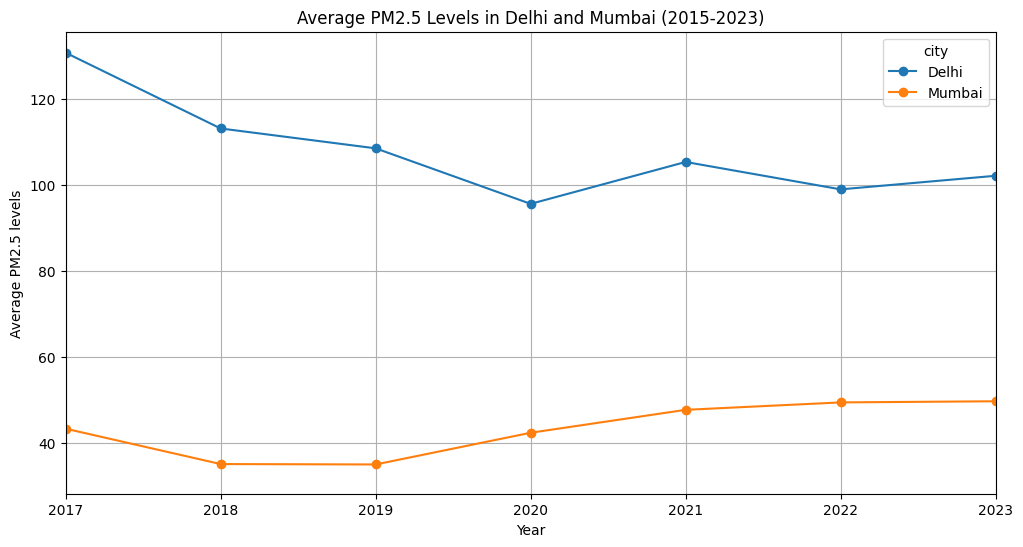

Fluctuations in PM2.5 levels in Delhi and Mumbai are as follows:
city
Delhi     84.553452
Mumbai    37.740497
Name: PM2.5, dtype: float64

Delhi had more fluctuations in PM2.5 levels compared to Mumbai


In [32]:
data_delhi_mumbai = data[(data['city'] == 'Delhi') | (data['city'] == 'Mumbai')].copy()

delhi_mumbai_pm = data_delhi_mumbai.groupby(['city','year'])['PM2.5'].mean().unstack() 

delhi_mumbai_pm.T.plot(kind = 'line', figsize = (12, 6), marker = 'o')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 levels')
plt.xlim(2017, 2023)
plt.title('Average PM2.5 Levels in Delhi and Mumbai (2015-2023)')
plt.grid(True)
plt.show()

fluctuations = data_delhi_mumbai.groupby('city')['PM2.5'].std()

print(f"Fluctuations in PM2.5 levels in Delhi and Mumbai are as follows:\n{fluctuations}\n")
print(f"{fluctuations.sort_values(ascending = False).index[0]} had more fluctuations in PM2.5 levels compared to {fluctuations.sort_values(ascending=False).index[1]}")

# Flucutation means the change in the PM2.5 levels over time.
# We have calculated it here by taking the standard deviation of PM2.5 levels across monitoring stations in each city.

**Ans: Delhi has the highest PM2.5 levels compared to Mumbai in all years from 2015 to 2023**

## Population-Based 

**1.  Which state in India has the highest number of monitoring stations relative to its population?** 

In [33]:
no_of_stations = data.groupby('state')['station'].nunique()
state_population = state_data.set_index('State')['Population']
station_relative_population = no_of_stations / state_population

print(f"State with the highest number of monitoring stations relative to its population is {station_relative_population.idxmax()}")

State with the highest number of monitoring stations relative to its population is Chandigarh


**2.  Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.**

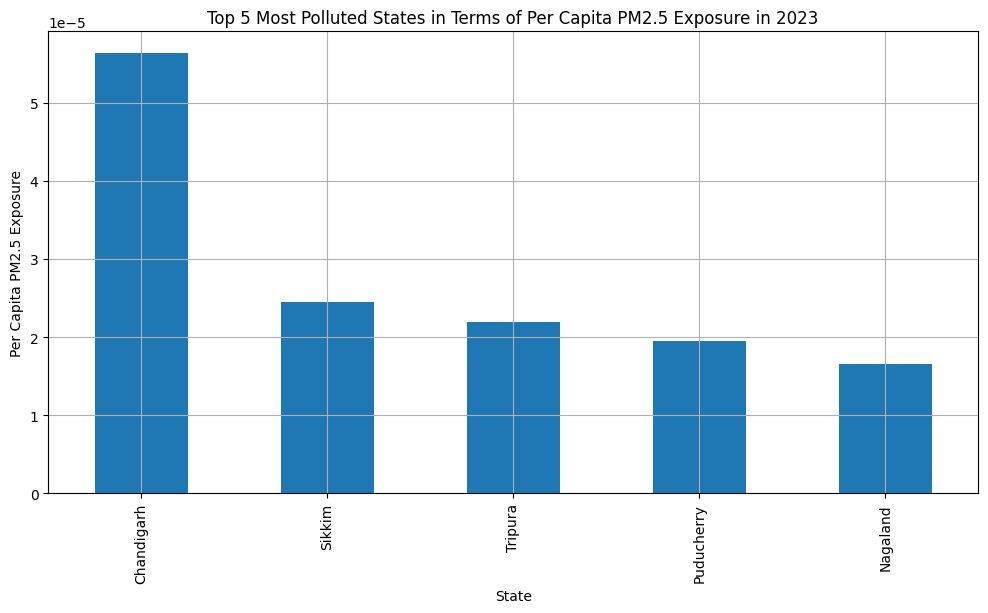

In [34]:
pm2_23 = data_2023.groupby('state')['PM2.5'].mean().sort_values(ascending = False)

exposure_per_capita = pm2_23/state_population

top_5 = exposure_per_capita.nlargest(5)

top_5.plot(kind = 'bar', figsize = (12, 6))

plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States in Terms of Per Capita PM2.5 Exposure in 2023')
plt.grid(True)
plt.show()

**3.  Plot the relationship between population density and average PM2.5 concentration for each state.**   
**What conclusion can you draw about the correlation between population density and pollution?**

a.  X-axis: Population density (people per square kilometer).  
b.  Y-axis: Average PM2.5 concentration.  
c.  Use a scatter plot to show the relationship, where each point represents a state.

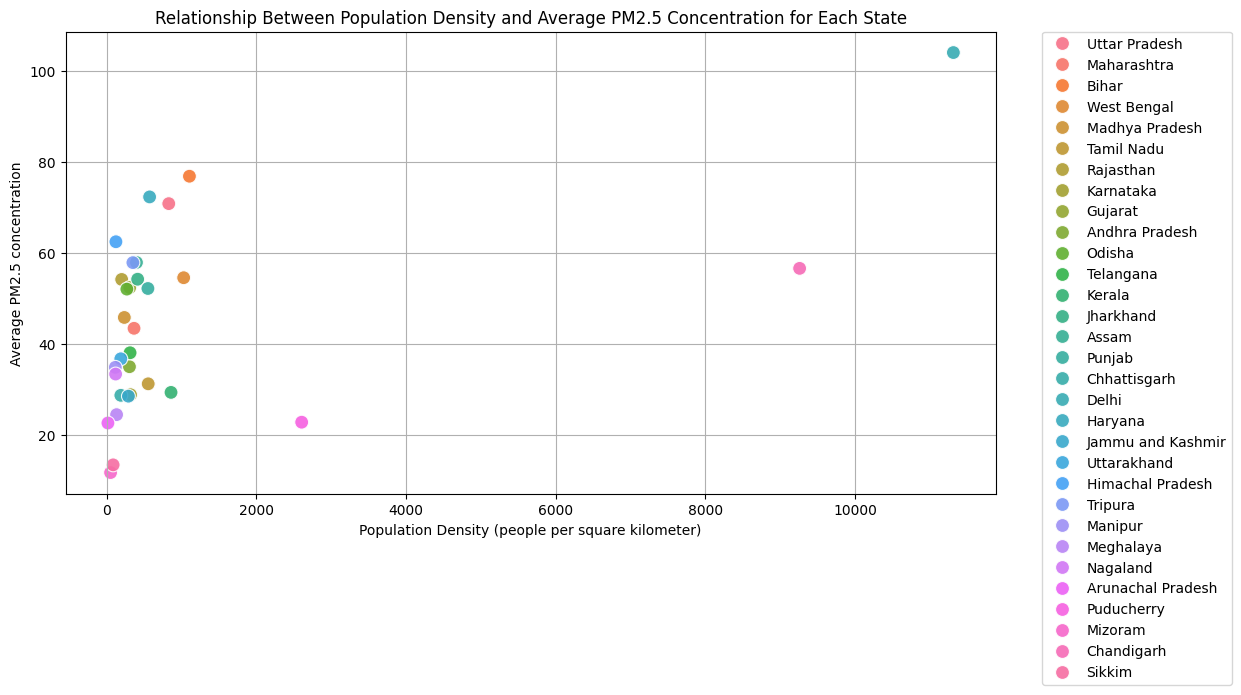

In [35]:
state_data = state_data.drop(columns = ['PM2.5'], errors = 'ignore')  # drops the column 'PM2.5' if it exists. So that further it won't create any error while merging.
population_density = state_data['Population'] / state_data['Area (km2)']

state_pm = data.groupby('state')['PM2.5'].mean()

state_data['Population Density'] = population_density

state_data = state_data.merge(state_pm, left_on = 'State', right_on = 'state').copy()
state_data = state_data.dropna() 

plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Population Density', y = 'PM2.5', data = state_data, s = 100, alpha = 0.9, hue = 'State')
plt.xlabel('Population Density (people per square kilometer)')
plt.ylabel('Average PM2.5 concentration')
plt.title('Relationship Between Population Density and Average PM2.5 Concentration for Each State')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0)
plt.grid(True)
plt.show()

# What conclusion can you draw about the correlation between population density and pollution?
# The scatter plot suggests a weak to moderate positive correlation between population density and PM2.5 concentration. 
# While many states with low population density have varying levels of PM2.5 pollution, highly dense states tend to have higher PM2.5 levels. 
# However, there are a few exceptions, indicating that other factors 

## Area Based [4 Marks] 
 


**1.  Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.**   
a.  X-axis: States.  
b.  Y-axis: PM2.5 concentration per square kilometer.  
c.  Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km. 

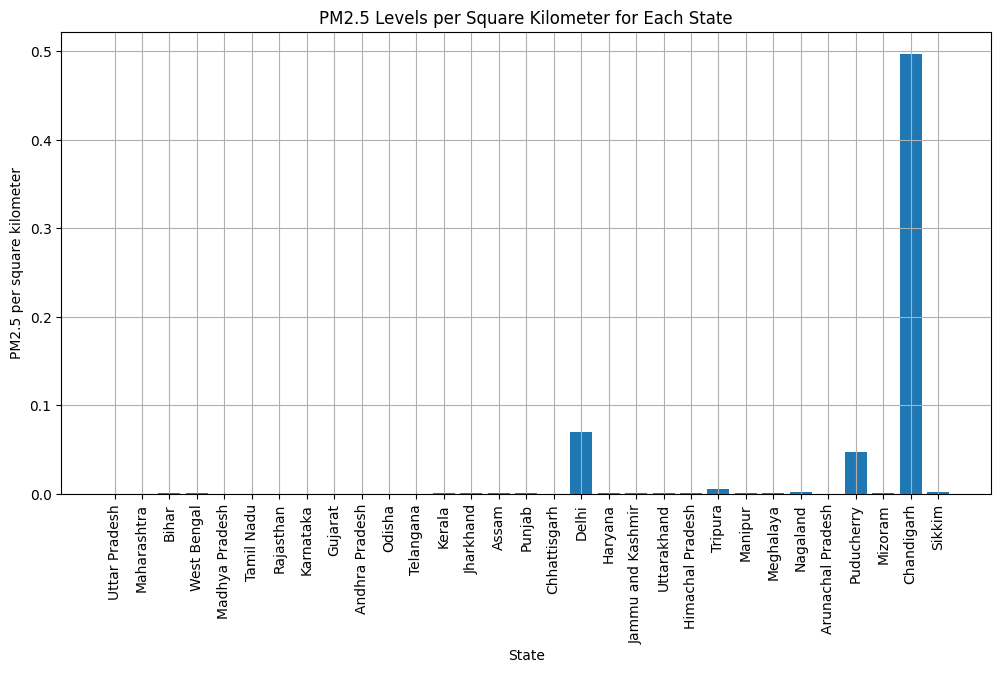

State with the highest PM2.5 levels per square kilometer is Chandigarh


In [36]:
pm_per_sqr_km = state_data['PM2.5'] / state_data['Area (km2)']

plt.figure(figsize=(12, 6))
plt.bar(state_data['State'], pm_per_sqr_km)
plt.xlabel('State')
plt.ylabel('PM2.5 per square kilometer')
plt.title('PM2.5 Levels per Square Kilometer for Each State')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

print(f"State with the highest PM2.5 levels per square kilometer is {state_data['State'][pm_per_sqr_km.idxmax()]}")

**2.  Compare the total number of monitoring stations per square kilometer in each state.**  
**Identify the state with the highest density of monitoring stations relative to its area.**    
**Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.**

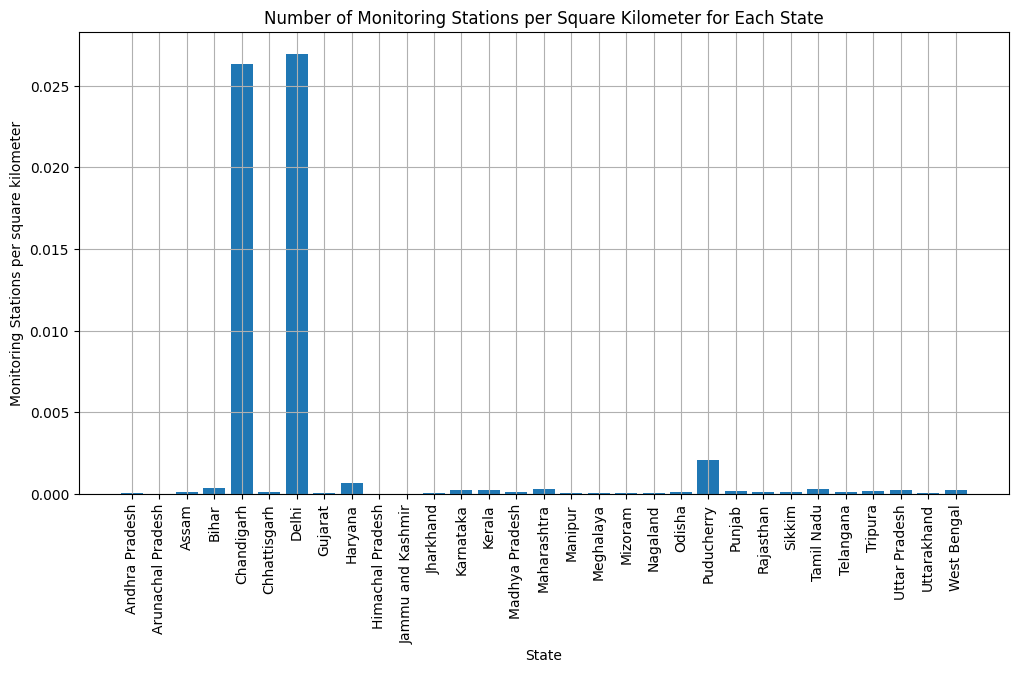

State with the highest number of monitoring stations per square kilometer is Delhi


In [37]:
station_per_km = no_of_stations / state_data.set_index('State')['Area (km2)']

plt.figure(figsize=(12, 6))
plt.bar(station_per_km.index, station_per_km)

plt.xlabel('State')
plt.ylabel('Monitoring Stations per square kilometer')
plt.title('Number of Monitoring Stations per Square Kilometer for Each State')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

print(f"State with the highest number of monitoring stations per square kilometer is {station_per_km.idxmax()}")

**3.  Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021.**   
Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states. 

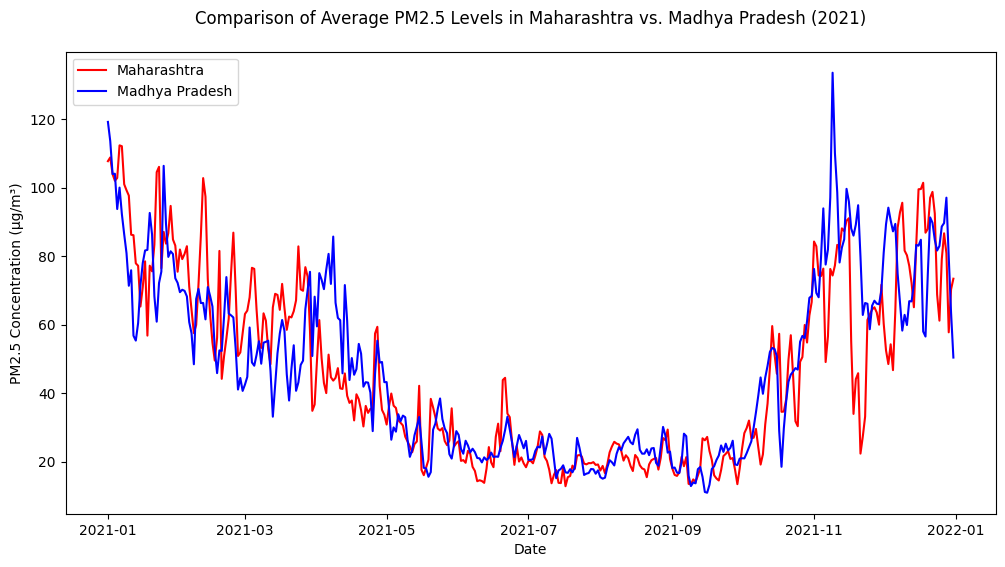

Average PM2.5 Levels in 2021:
Maharashtra: 46.45 μg/m³
Madhya Pradesh: 47.25 μg/m³


In [38]:
maha_data = data_2021[data_2021['state'] == 'Maharashtra']
mp_data = data_2021[data_2021['state'] == 'Madhya Pradesh']

maha_daily_avg = maha_data.groupby(maha_data['Timestamp'].dt.date)['PM2.5'].mean()
mp_daily_avg = mp_data.groupby(mp_data['Timestamp'].dt.date)['PM2.5'].mean()

plt.figure(figsize = (12, 6))
plt.plot(maha_daily_avg.index, maha_daily_avg, label = 'Maharashtra', color = 'red')
plt.plot(mp_daily_avg.index, mp_daily_avg, label = 'Madhya Pradesh', color = 'blue')

plt.title('Comparison of Average PM2.5 Levels in Maharashtra vs. Madhya Pradesh (2021)', pad = 20)
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.legend()
plt.show()

maha_avg_pm = maha_daily_avg.mean()
mp_avg_pm = mp_daily_avg.mean()

print(f"Average PM2.5 Levels in 2021:\nMaharashtra: {maha_avg_pm:.2f} μg/m³\nMadhya Pradesh: {mp_avg_pm:.2f} μg/m³")

# Population density did not affect the pollution levels in the states that much, as both are more or less the same.
# It also depends on other factors like the presence of factories and weather conditions.
# Thus, despite the high population density of Maharashtra, Madhya Pradesh has higher average PM 2.5 levels.

## Funding Based [3 Marks] 




**1.  Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.**

The average PM2.5 levels for states that received NCAP funding in 2021 is 50.89
The average PM2.5 levels for states that did not receive NCAP funding in 2021 is 43.88



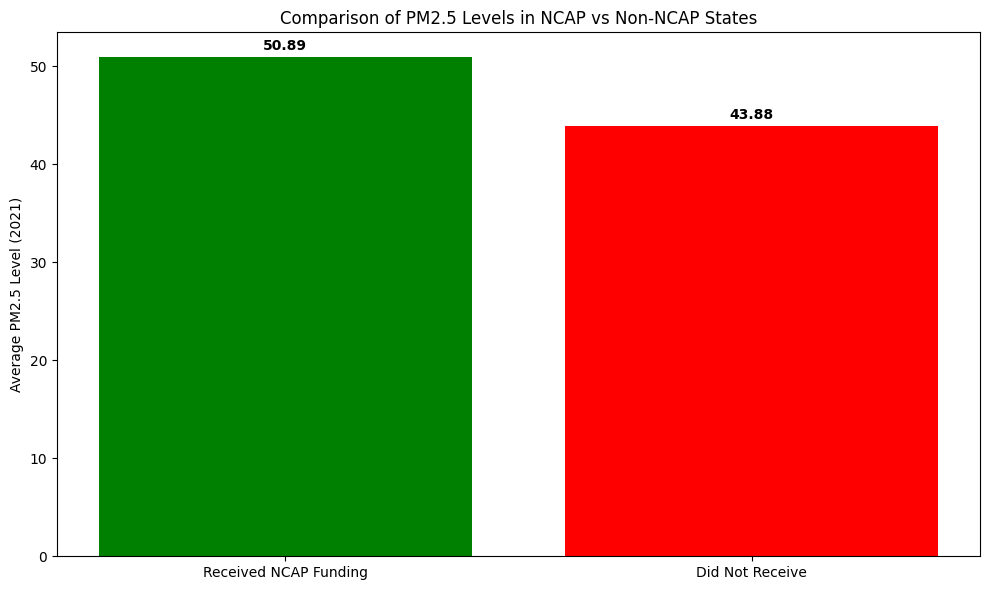

In [39]:
# First, converting some of the rows to integers as all are given in strings and replacing '-' with NaN

funding[funding == '-'] = np.nan
funding['Amount released during FY 2019-20'] = funding['Amount released during FY 2019-20'].astype(float)
funding['Amount released during FY 2020-21'] = funding['Amount released during FY 2020-21'].astype(float)
funding['Amount released during FY 2021-22'] = funding['Amount released during FY 2021-22'].astype(float)
funding['Total fund released'] = funding['Total fund released'].astype(float)
funding['Utilisation as on June 2022'] = funding['Utilisation as on June 2022'].astype(float)
funding['State'] = funding['State'].replace({'Jammu & Kashmir': 'Jammu and Kashmir'})          
# Needed to change jammu & kashmir to jammu and kashmir as it was causing problem ahead.

funding_state = funding.groupby('State')['Amount released during FY 2021-22'].sum()
received = funding_state[funding_state != 0]
unreceived = funding_state[funding_state == 0]

pm2_21 = data_2021.groupby('state')['PM2.5'].mean()

pm2_received = pm2_21[received.index].mean()
pm2_unreceived = pm2_21[unreceived.index].mean()

print(f"The average PM2.5 levels for states that received NCAP funding in 2021 is {pm2_received:.2f}")
print(f"The average PM2.5 levels for states that did not receive NCAP funding in 2021 is {pm2_unreceived:.2f}\n")

categories = ["Received NCAP Funding", "Did Not Receive"]
values = [pm2_received, pm2_unreceived]

plt.figure(figsize = (10, 6))
bars = plt.bar(categories, values, color = ['green', 'red'])

plt.bar_label(bars, fmt = '%.2f', padding = 3, fontsize = 10, fontweight = 'bold')
plt.ylabel("Average PM2.5 Level (2021)")
plt.title("Comparison of PM2.5 Levels in NCAP vs Non-NCAP States")
plt.tight_layout()

**2.  Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam.**  
**Has an increment of the financing led to noticeable improvements in air quality?**

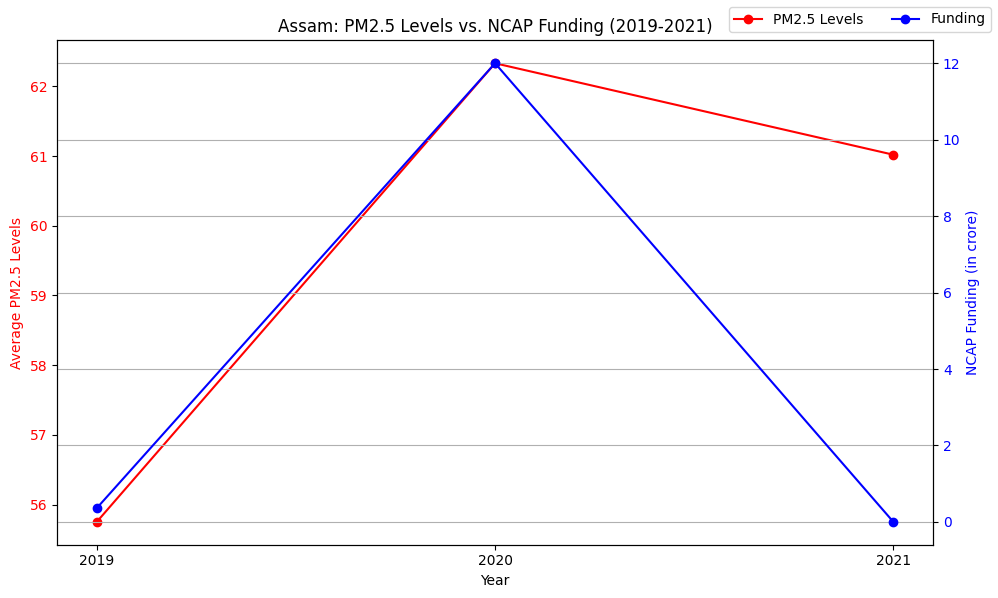

In [40]:
assam_funding = funding[funding['State'] == 'Assam']

data_2019 = data[data['year'] == 2019]
data_2020 = data[data['year'] == 2020]
data_2021 = data[data['year'] == 2021]

assam_19 = assam_funding.groupby('State')['Amount released during FY 2019-20'].sum().values[0]
assam_20 = assam_funding.groupby('State')['Amount released during FY 2020-21'].sum().values[0]
assam_21 = assam_funding.groupby('State')['Amount released during FY 2021-22'].sum().values[0]

assam_pm2_19 = data_2019[data_2019['state'] == 'Assam']['PM2.5'].mean()
assam_pm2_20 = data_2020[data_2020['state'] == 'Assam']['PM2.5'].mean()
assam_pm2_21 = data_2021[data_2021['state'] == 'Assam']['PM2.5'].mean()


years = [2019, 2020, 2021]
funding_values = [assam_19, assam_20, assam_21]
pm25_values = [assam_pm2_19, assam_pm2_20, assam_pm2_21]

fig, ax1 = plt.subplots(figsize = (10, 6))

ax1.plot(years, pm25_values, label = 'PM2.5 Levels', color = 'red', marker = 'o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5 Levels', color ='red')
ax1.tick_params(axis = 'y', labelcolor = 'red')
ax1.set_xticks(years)

ax2 = ax1.twinx()
ax2.plot(years, funding_values, label = 'Funding', color = 'blue', marker = 'o')
ax2.set_ylabel('NCAP Funding (in crore)', color = 'blue')
ax2.tick_params(axis = 'y', labelcolor = 'blue')

plt.title('Assam: PM2.5 Levels vs. NCAP Funding (2019-2021)')
fig.legend(loc = "upper right", ncol = 2)
plt.grid(True)
plt.tight_layout()
plt.show()

# No, the increase in funding has led to a decrease in air quality as compared to 2019 and increased a little in 2021 as compared to 2020.

**3.  Create a scatter plot to showcase the area versus funding received by a state.**
**Mark every state with a different color and show the legend outside the plot.**

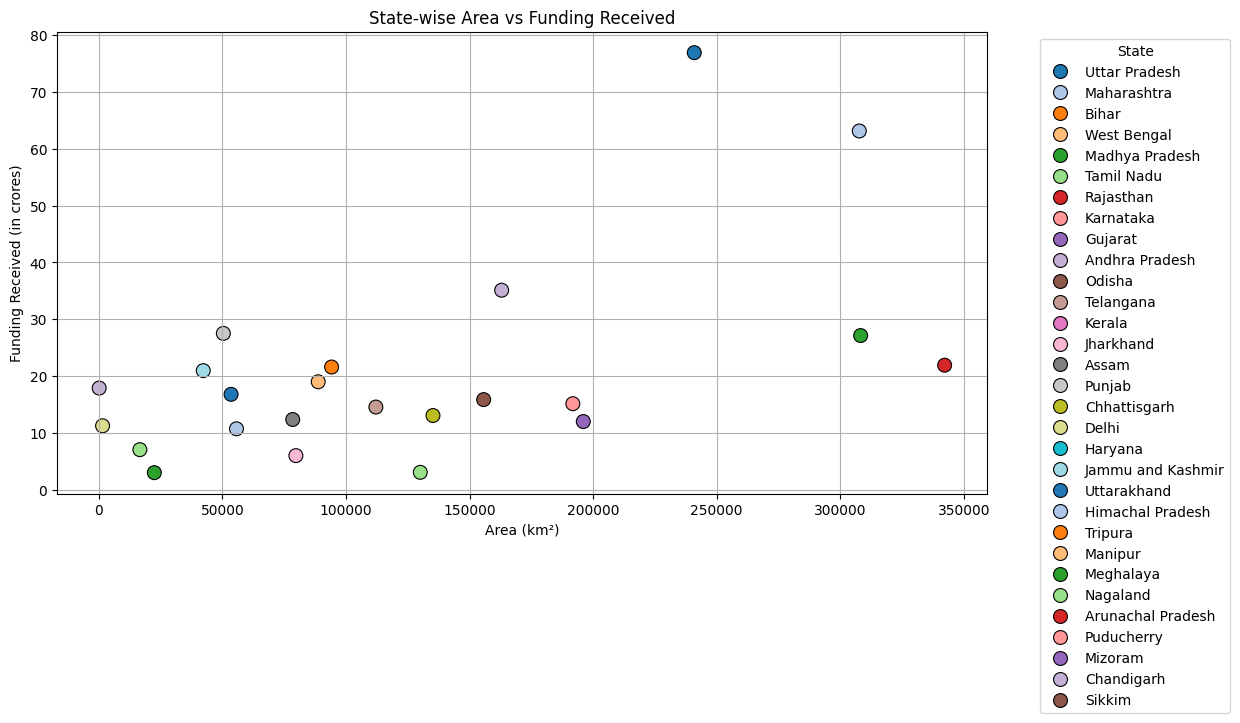

In [41]:
funding_state_all = funding.groupby('State')['Total fund released'].sum()
state_data = state_data.drop(columns = 'Total fund', errors = 'ignore')
state_data = state_data.merge(funding_state_all.rename('Total fund'), on = 'State', how = 'left')
plt.figure(figsize = (12, 6))
sns.scatterplot(data = state_data, y = 'Total fund', x = 'Area (km2)', s = 100, edgecolor = 'black', hue = 'State', palette = 'tab20')

plt.xlabel('Area (km²)')
plt.ylabel('Funding Received (in crores)')
plt.title('State-wise Area vs Funding Received')

plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', title = "State")
plt.grid(True)
plt.show()

## Miscellaneous Questions



**1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 μg/m³)**

In [42]:
data_23 = data[data['year'] == 2023]

city_pm = data_23.groupby('city')['PM2.5'].mean()

max_city_pm = city_pm.idxmax()

most_polluted_city_data = data_23[data_23['city'] == max_city_pm]
days_above_300 = (most_polluted_city_data['PM2.5'] > 300).sum()
percentage_above = (days_above_300 / 365) * 100

print(f"Percentage of days with PM2.5 > 300 in {max_city_pm} (2023): {percentage_above:.2f}%")

Percentage of days with PM2.5 > 300 in Darbhanga (2023): 0.82%


**2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020).
Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?**

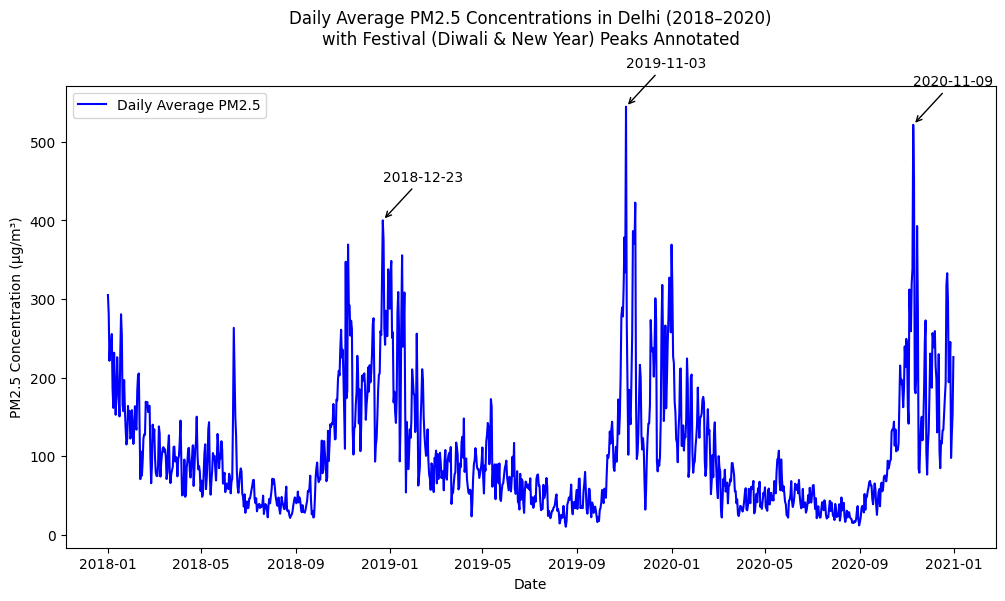

In [43]:
delhi_data = data[(data['state'] == 'Delhi') & (data['year'].between(2018, 2020))]

daily_avg = delhi_data.groupby(delhi_data['Timestamp'].dt.date)['PM2.5'].mean()

daily_avg_df = daily_avg.reset_index()  # converting series into dataframe for easy handling.
daily_avg_df.columns = ['date', 'PM2.5']
daily_avg_df['date'] = pd.to_datetime(daily_avg_df['date'])
daily_avg_df['month'] = daily_avg_df['date'].dt.month
daily_avg_df['year'] = daily_avg_df['date'].dt.year

festival_months = [10, 11, 12]

festival_df = daily_avg_df[daily_avg_df['month'].isin(festival_months)]

# For each year, find the index of the row with the maximum PM2.5 value
peak_indices = festival_df.groupby('year')['PM2.5'].idxmax()

festival_peaks = daily_avg_df.loc[peak_indices]


plt.figure(figsize=(12, 6))
plt.plot(daily_avg_df['date'], daily_avg_df['PM2.5'], color = 'blue', label = 'Daily Average PM2.5')

# Annotate peaks with an arrow.
festival_peaks.apply(lambda row: plt.annotate(str(row['date'].date()), xy = (row['date'], row['PM2.5']), xytext = (row['date'], row['PM2.5'] + 50), arrowprops = dict(facecolor = 'black', arrowstyle = '->'), color = 'black'), axis=1)

plt.title('Daily Average PM2.5 Concentrations in Delhi (2018–2020)\nwith Festival (Diwali & New Year) Peaks Annotated', pad = 30)
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.legend()
plt.show()

**3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023.  
Use a line graph to compare yearly average PM2.5 trends.**

State with highest NCAP funding in 2020: Andhra Pradesh


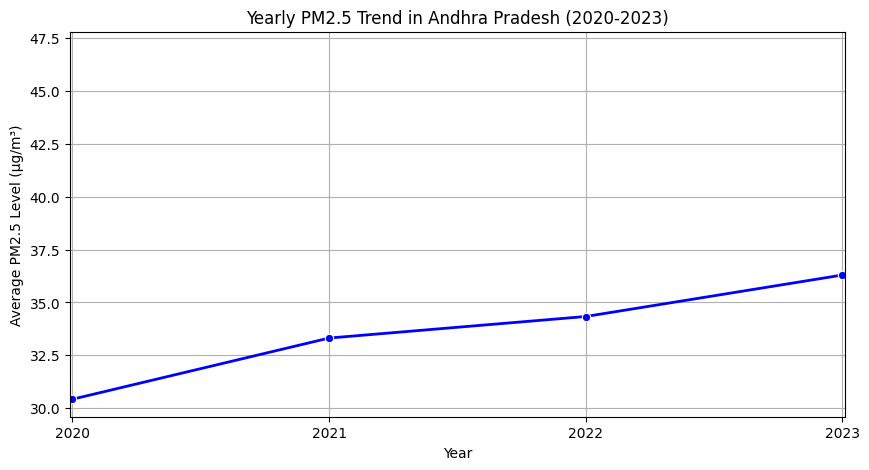

In [44]:
highest_funding_state = funding.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()

print(f"State with highest NCAP funding in 2020: {highest_funding_state}")

state_pm_trend = data[data['state'] == highest_funding_state].groupby('year')['PM2.5'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x = state_pm_trend.index, y = state_pm_trend.values, marker = 'o', linewidth = 2, color = 'b')

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level (μg/m³)")
plt.xlim(2019.99,2023.01)
plt.xticks([2020,2021,2022,2023])
plt.title(f"Yearly PM2.5 Trend in {highest_funding_state} (2020-2023)")
plt.grid(True)
plt.show()

# Its pollution level increased from 2020 to 2023

**4. Draw the map of India and plot the sensor locations on the map.**

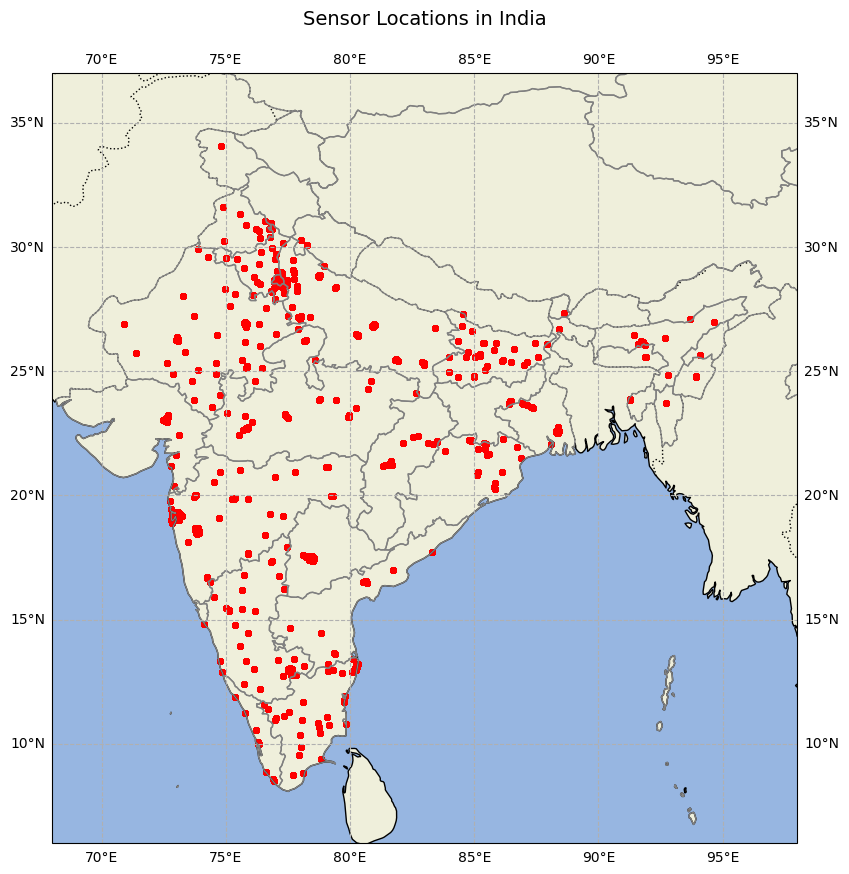

In [45]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

data_cleaned = data.dropna(subset = ['latitude', 'longitude'])   # removed all stations with missing latitude and longitude values

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection = ccrs.PlateCarree())
ax.set_extent([68, 98, 6, 37], crs = ccrs.PlateCarree())   

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle = ':')
ax.add_feature(cfeature.STATES, edgecolor = 'gray')
ax.gridlines(draw_labels = True, linestyle = '--')

ax.scatter(data_cleaned['longitude'], data_cleaned['latitude'], color = 'red', marker = 'o', s = 15)

plt.title('Sensor Locations in India', fontsize = 14, pad = 20)
plt.show()

## Tell us something new 

**Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers**

## Our Reflections :

### (1)AIR QUALITY

**1) The dataset records PM2.5 levels as high as 1000 µg/m³, which is extremely hazardous.  
2) The average PM2.5 concentration is around 58.88 µg/m³, which exceeds the WHO recommended limit (10 µg/m³ annual mean).  
3) Similarly, PM10 values also reach 1000 µg/m³, with an average of 122.48 µg/m³, indicating widespread poor air quality.**

### (2) Missing Air Quality Data
**PM2.5 is missing in nearly 900,000 cases, and PM10 is missing in over 928,000 cases.  
Around 63,759 rows lack latitude/longitude and city/state information, making geospatial analysis difficult.**  

***Policy Implication:***  
**Data collection needs improvement with more reliable and consistent air quality monitoring stations.**

### (3) From the India's plot

**It is evident that there is a higher concentration of sensor locations near Mumbai and Delhi compared to other cities and states, highlighting the significance of metropolitan areas in India. For policymakers, it is crucial to consider a more balanced distribution of measuring stations across the country. Notably, regions such as Uttar Pradesh and Assam have comparatively fewer stations than Maharashtra and Karnataka.** 

***For policy makers: An even distribution of the measuring stations would ensure more comprehensive data collection.***